<a href="https://colab.research.google.com/github/rish88c/DAV/blob/main/Exp_03/DAV_EXP03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Aim**: Multiple Linear Regression in Python and R



Lab Outcomes (LO): Implement various Regression techniques for prediction. (LO2)

Tools and Libraries:Python Libraries: scikit-learn, matplotlib, numpy, pandas

R Libraries: lm, ggplot2, dplyr, broom, ggubr

**Import packages and dataset**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


**Check basic info on the data set**

**'info()' method to check the data types and number**



In [3]:
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**'columns' method to get the names of the columns (features)**



In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

**Basic plotting and visualization on the data set**


**Pairplots using seaborn**


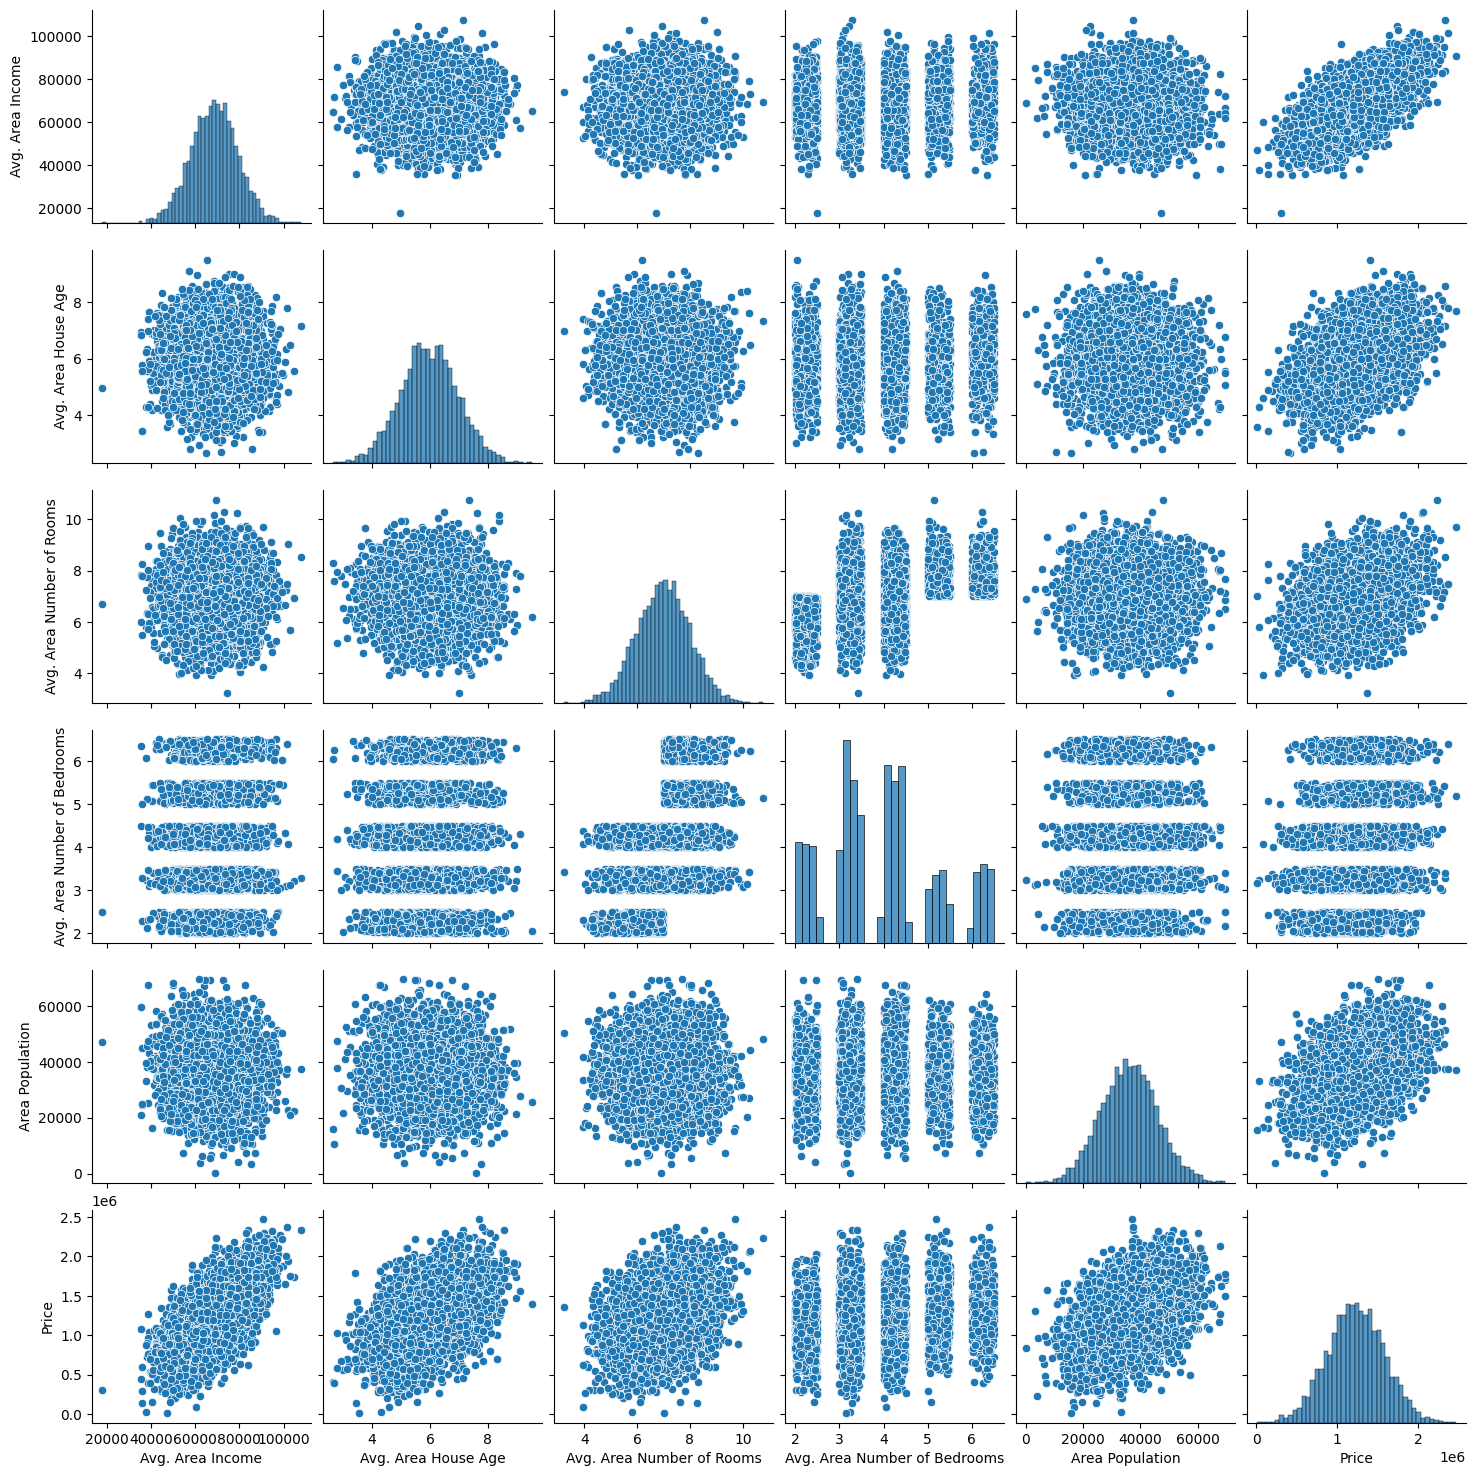

In [6]:
sns.pairplot(df)

**Distribution of price (the predicted quantity)**


<Axes: ylabel='Frequency'>

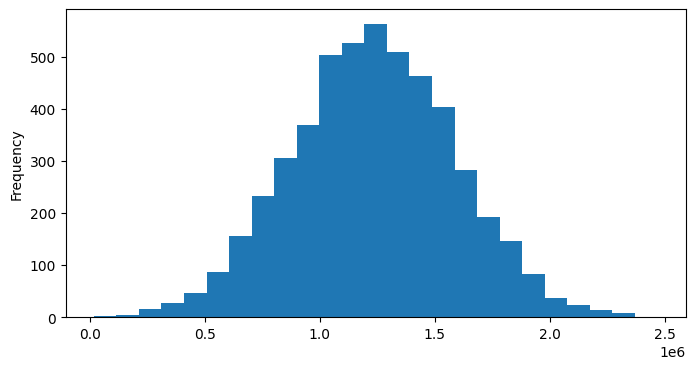

In [7]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

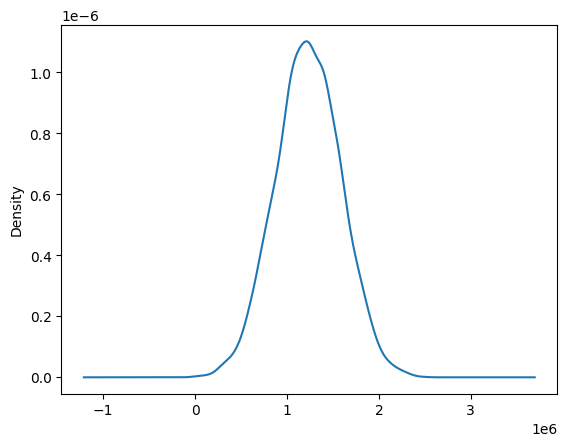

In [8]:
df['Price'].plot.density()


**Correlation matrix and heatmap**


In [9]:
df.corr()


<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<ipython-input-10-73d88c5a3f1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=2)


<Axes: >

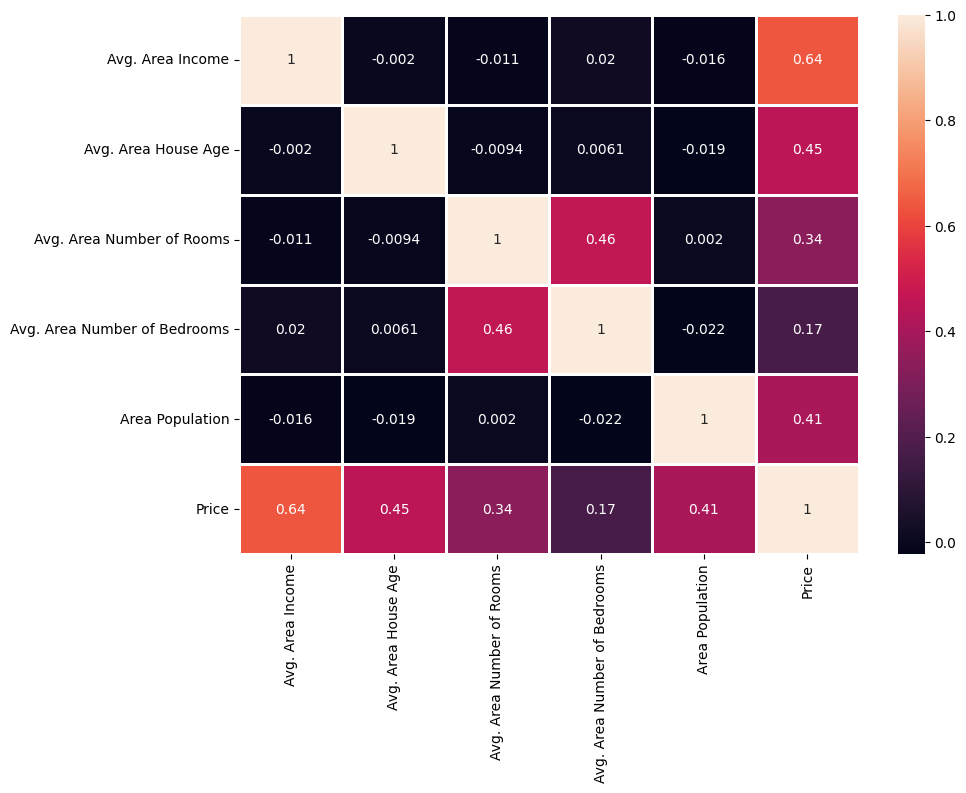

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

**Feature and variable sets**


**Make a list of data frame column names**

In [11]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [12]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

In [13]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 5)
Variable set size: (5000,)


In [14]:

X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [15]:
y.head()


0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [18]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'


**Fit the model on to the instantiated object itself**



In [21]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable


LinearRegression()

**Check the intercept and coefficients and put them in a DataFrame**



In [22]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -2631028.9017454907


In [23]:
print("The coefficients of the linear model:", lm.coef_)


The coefficients of the linear model: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [24]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


**Calculation of standard errors and t-statistic for the coefficients**


In [25]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Avg. Area Income,21.597602,0.160361,134.681505
Avg. Area House Age,165201.104954,1722.412068,95.912649
Avg. Area Number of Rooms,119061.463868,1696.546476,70.178722
Avg. Area Number of Bedrooms,3212.585606,1376.451759,2.333962
Area Population,15.228121,0.169882,89.639472


In [26]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms


In [27]:
X = df[['Avg. Area Income', 'Avg. Area House Age']]
y = df['Price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])


The intercept term of the linear model: -1167841.825864086
The coefficients of the linear model: [2.11455223e+01 1.59053439e+05]


In [31]:
print("R-squared value of this fit:", round(metrics.r2_score(y_train, train_pred), 3))


R-squared value of this fit: 0.917


In [33]:
predictions = lm.predict(X_test)


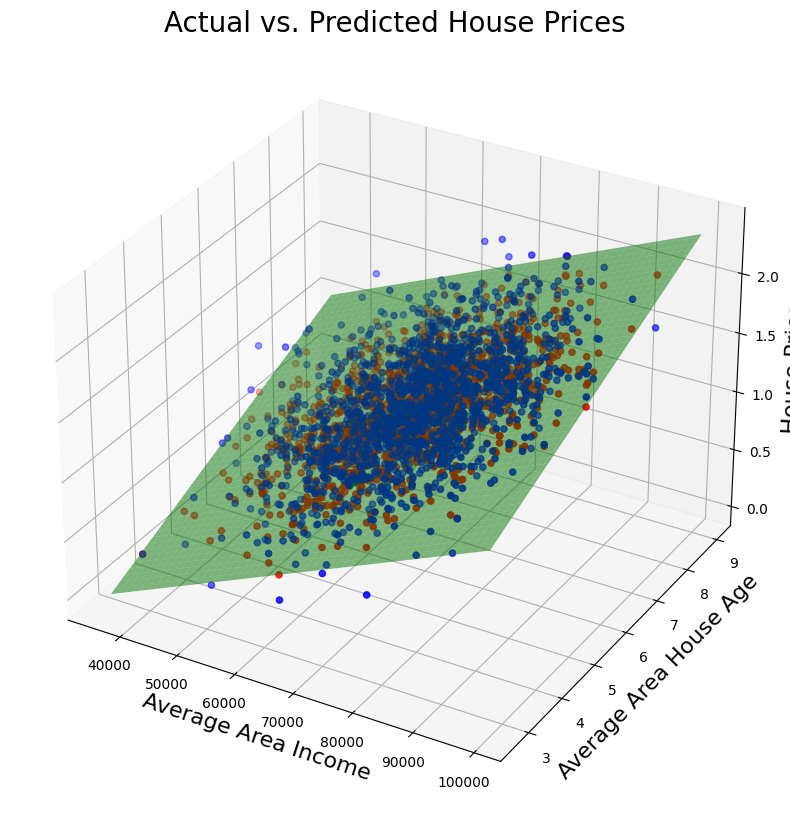

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual test set house prices vs. predicted house prices vs. Avg. Area House Age
ax.scatter(X_test['Avg. Area Income'], X_test['Avg. Area House Age'], y_test, color='blue', label='Actual Prices')
ax.scatter(X_test['Avg. Area Income'], X_test['Avg. Area House Age'], predictions, color='red', label='Predicted Prices')

# Define a mesh grid for the plane
x_surf = np.linspace(X_test['Avg. Area Income'].min(), X_test['Avg. Area Income'].max(), 100)
y_surf = np.linspace(X_test['Avg. Area House Age'].min(), X_test['Avg. Area House Age'].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Generate predicted prices using the regression model
z_surf = lm.intercept_ + lm.coef_[0] * x_surf + lm.coef_[1] * y_surf

# Plot the plane representing the regression model
ax.plot_surface(x_surf, y_surf, z_surf,color='green', alpha=0.5, label='Regression Plane')

# Change the color of two specific points
# For example, change the color of the first two actual test set points to green
ax.scatter(X_test.iloc[0:2]['Avg. Area Income'], X_test.iloc[0:2]['Avg. Area House Age'], y_test.iloc[0:2], color='green', s=100, label='Special Points')

# Set labels and legend
ax.set_xlabel('Average Area Income', fontsize=16)
ax.set_ylabel('Average Area House Age', fontsize=16)
ax.set_zlabel('House Prices', fontsize=16)
ax.set_title('Actual vs. Predicted House Prices', fontsize=20)

# Show the plot
plt.show()


<ipython-input-35-c50aad9ec690>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test - predictions])


<Axes: title={'center': 'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

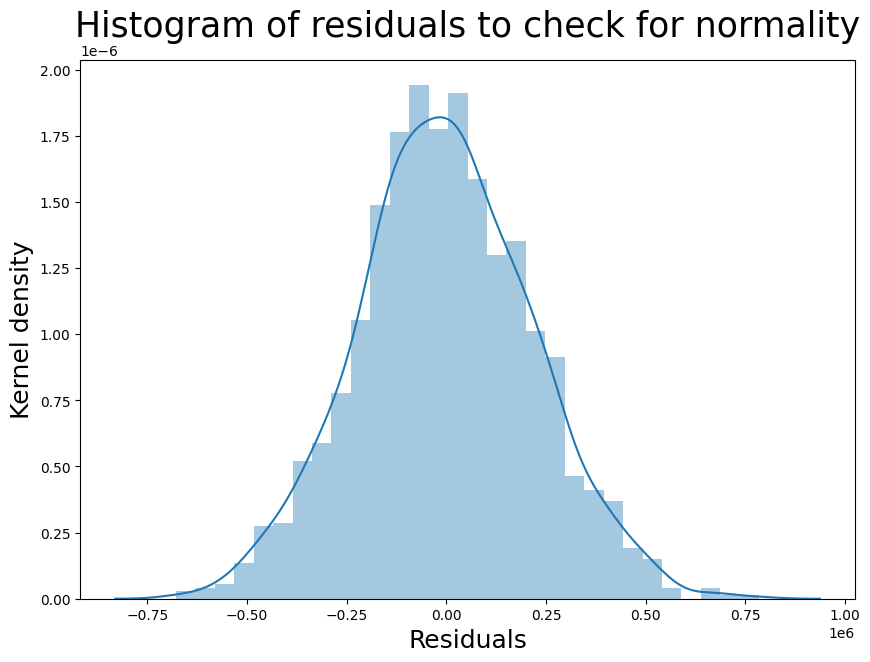

In [35]:
plt.figure(figsize=(10, 7))
plt.title("Histogram of residuals to check for normality", fontsize=25)
plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test - predictions])

In [36]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test, predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test, predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean absolute error (MAE): 173538.07143184566
Mean square error (MSE): 47826332336.24629
Root mean square error (RMSE): 218692.32345065588


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate mean absolute error (MAE)
MAE = mean_absolute_error(y_test, predictions)

# Calculate mean squared error (MSE)
MSE = mean_squared_error(y_test, predictions)

# Calculate root mean squared error (RMSE)
RMSE = np.sqrt(MSE)

# Print the metrics
print("Mean absolute error (MAE):", MAE)
print("Mean square error (MSE):", MSE)
print("Root mean square error (RMSE):", RMSE)

# Generate the equation of the line
coefficients = lm.coef_
intercept = lm.intercept_

equation_of_line = "Price = " + str(round(intercept, 3)) + " + "
for i in range(len(coefficients)):
    equation_of_line += str(round(coefficients[i], 3)) + " * " + X.columns[i]
    if i < len(coefficients) - 1:
        equation_of_line += " + "

print("Equation of the line:")
print(equation_of_line)


Mean absolute error (MAE): 173538.07143184566
Mean square error (MSE): 47826332336.24629
Root mean square error (RMSE): 218692.32345065588
Equation of the line:
Price = -1167841.826 + 21.146 * Avg. Area Income + 159053.439 * Avg. Area House Age


In [37]:
print("R-squared value of predictions:", round(metrics.r2_score(y_test, predictions), 3))

R-squared value of predictions: 0.632


## Using R

In [ ]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘reshape2’




In [ ]:
install.packages('Metrics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('rgl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’




In [ ]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("tidymodels")  # Install the tidymodels package
library(tidymodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘warp’, ‘lhs’, ‘DiceDesign’, ‘patchwork’, ‘furrr’, ‘slider’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.6     ✔ workflows    1.1.3
✔ modeldata    1.3.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.3.0
✔ recipes      1.0.9     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ yardstick::accuracy()    masks Metrics::accuracy()
✖ scales::discard()        masks purrr::discard()
✖ dplyr::filter()          masks stats::filter()
✖ recipes::fixed()         masks stringr::fixed()
✖ dplyr::lag()             masks stats::lag()
✖ caret::lift()            mas

In [ ]:
library(tidyverse)
library(caret)
library(Metrics)
library(rgl)
library(corrplot)

corrplot 0.92 loaded



In [ ]:
# Load the dataset
df <- read.csv("USA_Housing.csv")

In [ ]:
# Check the first few rows of the dataset
head(df)

,Avg..Area.Income,Avg..Area.House.Age,Avg..Area.Number.of.Rooms,Avg..Area.Number.of.Bedrooms,Area.Population,Price,Address
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,79545.46,5.682861,7.009188,4.09,23086.80,1059033.6,"208 Michael Ferry Apt. 674 Laurabury, NE 37010-5101"
2,79248.64,6.002900,6.730821,3.09,40173.07,1505890.9,"188 Johnson Views Suite 079 Lake Kathleen, CA 48958"
3,61287.07,5.865890,8.512727,5.13,36882.16,1058988.0,"9127 Elizabeth Stravenue Danieltown, WI 06482-3489"
4,63345.24,7.188236,5.586729,3.26,34310.24,1260616.8,USS Barnett FPO AP 44820
5,59982.20,5.040555,7.839388,4.23,26354.11,630943.5,USNS Raymond FPO AE 09386
6,80175.75,4.988408,6.104512,4.04,26748.43,1068138.1,"06039 Jennifer Islands Apt. 443 Tracyport, KS 16077"


In [ ]:
# Check basic info on the dataset
str(df)

'data.frame':	5000 obs. of  7 variables:
 $ Avg..Area.Income            : num  79545 79249 61287 63345 59982 ...
 $ Avg..Area.House.Age         : num  5.68 6 5.87 7.19 5.04 ...
 $ Avg..Area.Number.of.Rooms   : num  7.01 6.73 8.51 5.59 7.84 ...
 $ Avg..Area.Number.of.Bedrooms: num  4.09 3.09 5.13 3.26 4.23 4.04 3.41 2.42 2.3 6.1 ...
 $ Area.Population             : num  23087 40173 36882 34310 26354 ...
 $ Price                       : num  1059034 1505891 1058988 1260617 630943 ...
 $ Address                     : chr  "208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101" "188 Johnson Views Suite 079\nLake Kathleen, CA 48958" "9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489" "USS Barnett\nFPO AP 44820" ...


NULL


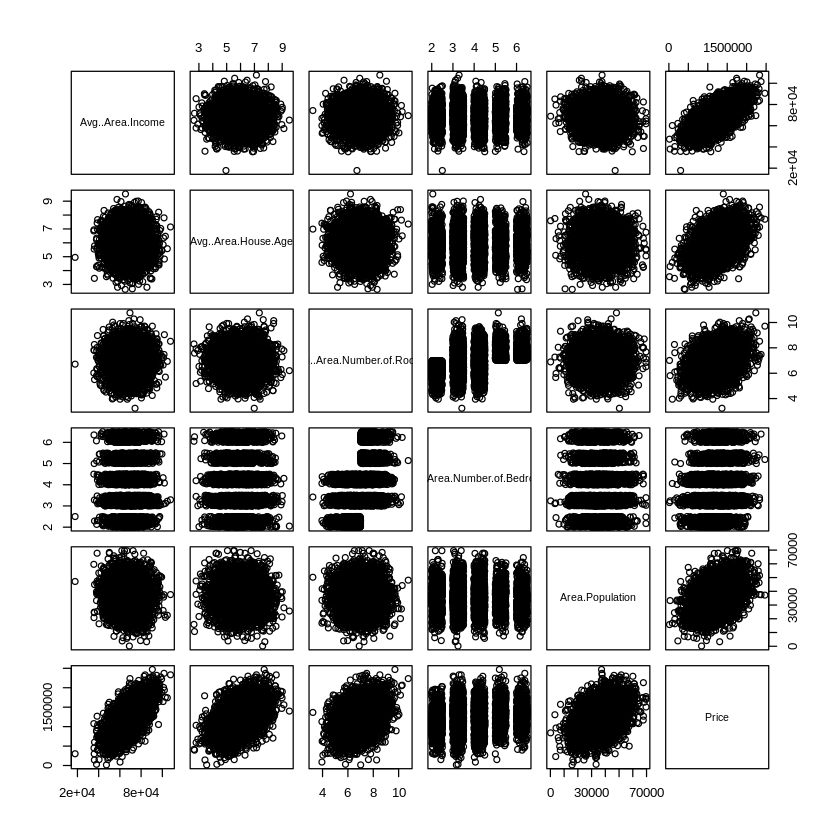

In [ ]:
# Filter only numeric variables
numeric_vars <- select_if(df, is.numeric)

# Create scatterplot matrix
scatterplot_matrix <- pairs(numeric_vars)

print(scatterplot_matrix)

In [ ]:
# Distribution of price (the predicted quantity)
hist_price <- ggplot(df, aes(x = Price)) +
  geom_histogram(binwidth = 250000, fill = "lightblue", color = "black") +
  labs(x = "Price", y = "Frequency", title = "Distribution of Price")

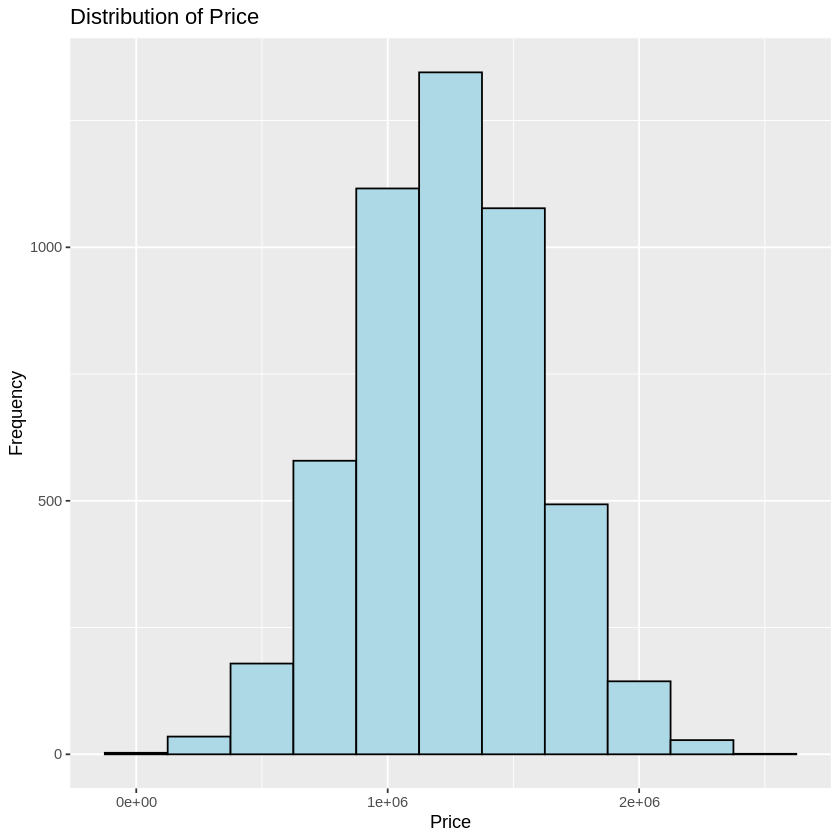

In [ ]:
print(hist_price)

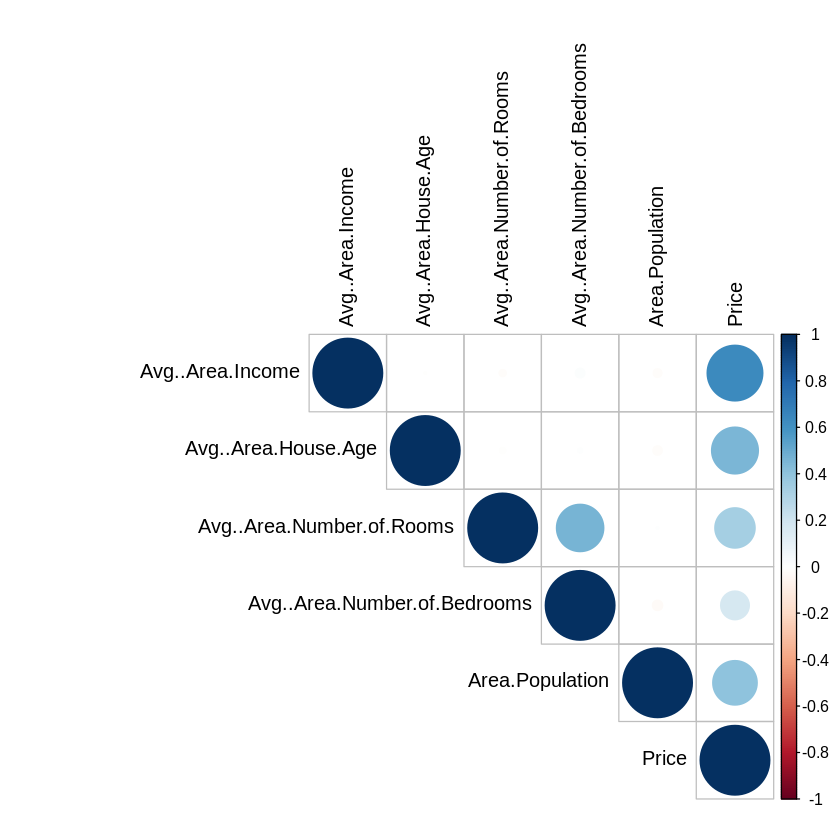

In [ ]:
#Correlation matrix and heatmap
correlation_matrix <- cor(df[, c("Avg..Area.Income", "Avg..Area.House.Age", "Avg..Area.Number.of.Rooms", "Avg..Area.Number.of.Bedrooms", "Area.Population", "Price")])
corrplot(correlation_matrix, method = "circle", type = "upper", tl.col = "black")

In [ ]:
# Subset features for a simpler model
X <- df[, c("Avg..Area.Income", "Avg..Area.House.Age")]
y <- df$Price

In [ ]:
set.seed(123)
train_indices <- createDataPartition(y, p = 0.7, list = FALSE)
X_train <- X[train_indices, ]
y_train <- y[train_indices]
X_test <- X[-train_indices, ]
y_test <- y[-train_indices]

In [ ]:
# Ensure 'Price' is included in the training data frame
X_train$Price <- y_train

# Train a linear regression model on the simpler feature set
lm_model_simple <- lm(Price ~ ., data = X_train)


In [ ]:
# Make predictions on the test set
test_pred <- predict(lm_model_simple, newdata = X_test)

In [ ]:
# Evaluate model performance
MAE <- mean(abs(y_test - test_pred))
MSE <- mean((y_test - test_pred)^2)
RMSE <- sqrt(MSE)
R_squared <- cor(y_test, test_pred)^2

In [ ]:
print(paste("Mean Absolute Error (MAE):", round(MAE, 3)))
print(paste("Mean Squared Error (MSE):", round(MSE, 3)))
print(paste("Root Mean Squared Error (RMSE):", round(RMSE, 3)))
print(paste("R-squared Value:", round(R_squared, 3)))

[1] "Mean Absolute Error (MAE): 176596.681"
[1] "Mean Squared Error (MSE): 49411672933.745"
[1] "Root Mean Squared Error (RMSE): 222287.366"
[1] "R-squared Value: 0.619"


In [ ]:
# Equation of the line
cat("Equation of the line: \n")
cat(paste("Price =", round(coefficients(lm_model_multiple)[1], 3), "+",
           round(coefficients(lm_model_multiple)[2], 3), "* X1 +",
           round(coefficients(lm_model_multiple)[3], 3), "* X2 "))

Equation of the line: 
Price = -2056946.751 + 21.353 * X1 + 162803.968 * X2 

In [ ]:
# Install and load the required package
install.packages("rgl")
library(rgl)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



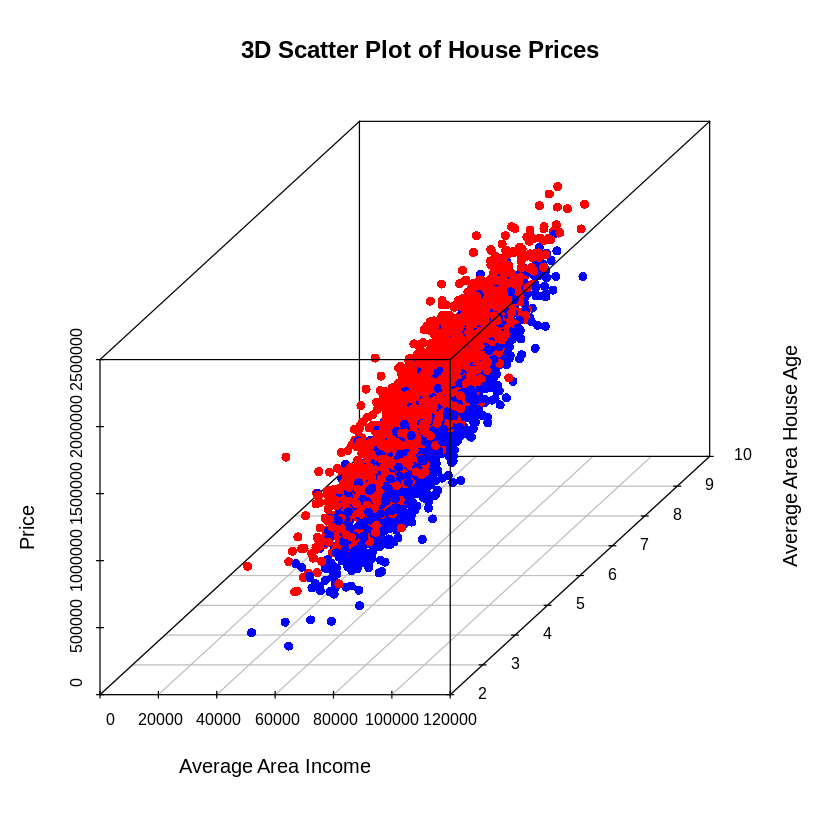

In [ ]:
# Create a vector of colors based on another variable in your dataframe
colors <- ifelse(df$Area.Population > mean(df$Area.Population), "red", "blue")

# Create the 3D scatter plot
scatterplot3d(df$Avg..Area.Income, df$Avg..Area.House.Age, df$Price,
               color = colors, pch = 16,
               xlab = "Average Area Income", ylab = "Average Area House Age", zlab = "Price",
               main = "3D Scatter Plot of House Prices")

**Conclusion-**
Successfully performed multiple linear regression on Housing Dataset in R and Python